# DATA CLEANING

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# features

df = pd.read_csv('datasets/dengue_features_train.csv', parse_dates=[3])
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
# target

target = pd.read_csv('datasets/dengue_labels_train.csv')
target.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


## Clean

1. Split data into seperate cities because we don't want imputation from one city's data into another.
2. Find what data is missing in each city.
3. Impute something into those missing data cells. Because the data is time-dependent, imputation will be done with respect to closest available data by date.

In [6]:
# target data is all there
target.isnull().sum()

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

In [7]:
# create new datasets

df_sj = df[df['city'] == 'sj']
df_iq = df[df['city'] == 'iq']

In [8]:
# see which features have missing values
df_sj.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [9]:
# see which features have missing values
df_iq.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

Text(0.5,1,'Iquitos Missing Data')

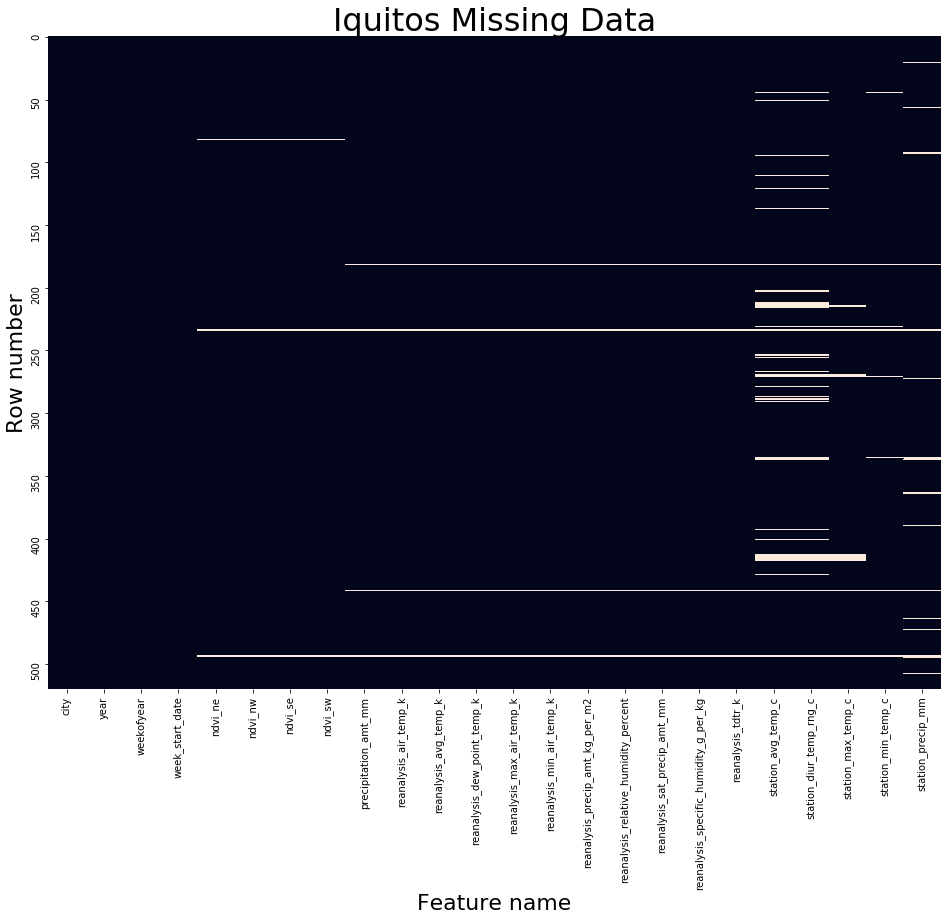

In [10]:
# viz missing data

fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df_iq.isnull().reset_index(drop=True),ax=ax, cbar = False, yticklabels = 50)

plt.ylabel("Row number", size = 22)
plt.xlabel("Feature name", size = 22)
plt.title("Iquitos Missing Data", size = 32)

`station_avg_temp_C` and `station_diur_temp_rng_c` both tend to be missing on the same observation. Also, there are a few observations where the entire row of measurements (not including dates) are missing, and a few where only the weather measurements are gone.

Text(0.5,1,'San Juan Missing Data')

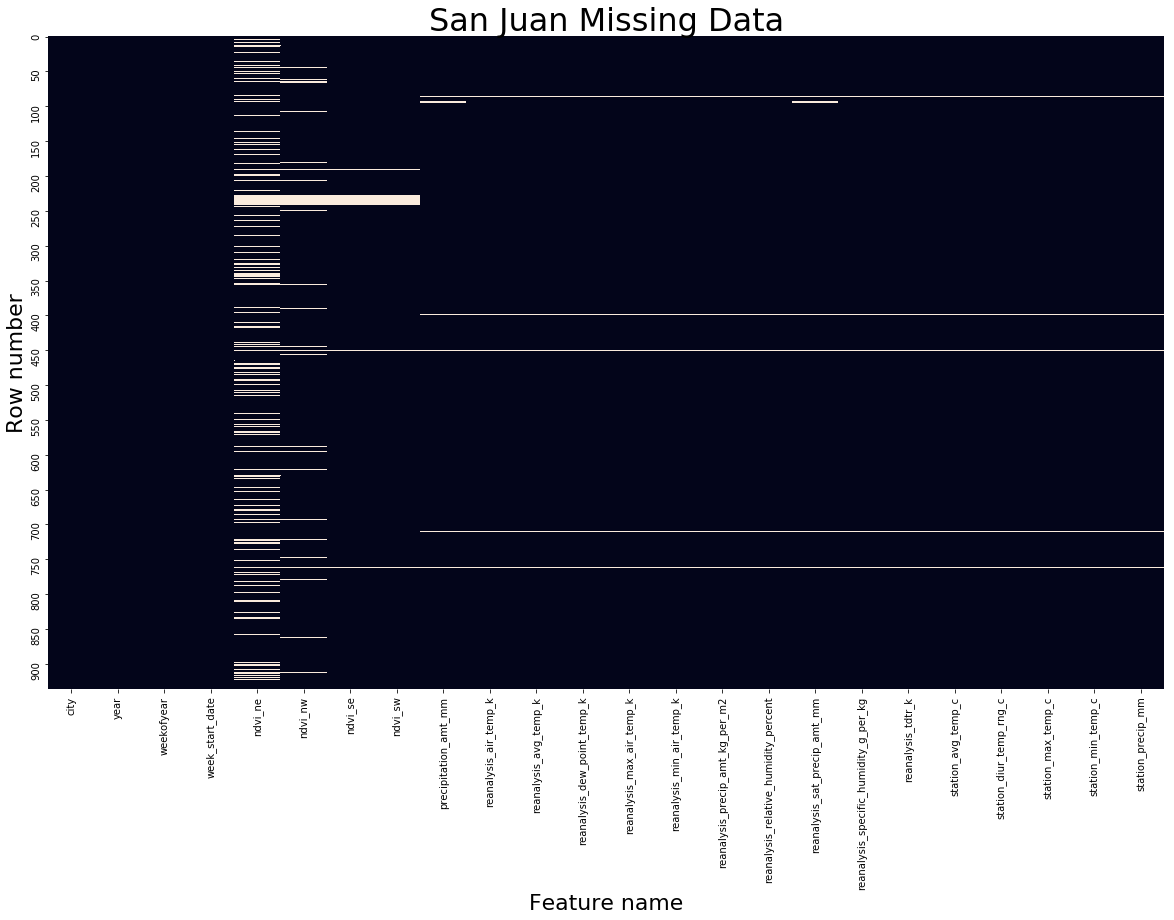

In [11]:
# viz missing data

fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_sj.isnull(),ax=ax, cbar = False, yticklabels = 50)

plt.ylabel("Row number", size = 22)
plt.xlabel("Feature name", size = 22)
plt.title("San Juan Missing Data", size = 32)

`nvdi_ne` and sometimes `nvdi_nw` are missing. There is a large block around row 225 where all satellite data is missing.

In [13]:
## Impute into Missing values

## see: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
## see: https://pandas.pydata.org/pandas-docs/stable/missing_data.html
## front fill and back fill allows for date-sensitive na fill

df_sj = df_sj.fillna(method = 'ffill')
df_iq = df_iq.fillna(method = 'ffill')